<a href="https://colab.research.google.com/github/ssse0y/-KidscafeLocationAnalysis/blob/main/%EA%B4%91%EC%A7%84%EA%B5%AC_%EA%B2%A9%EC%9E%90%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np

In [ ]:
import requests
import time

# 1.광진구_100M 격자데이터_유아 인구 수, 40대 인구 수, 공시지가 병합

## 1-1.유아 인구 수_2024년 10월 기준

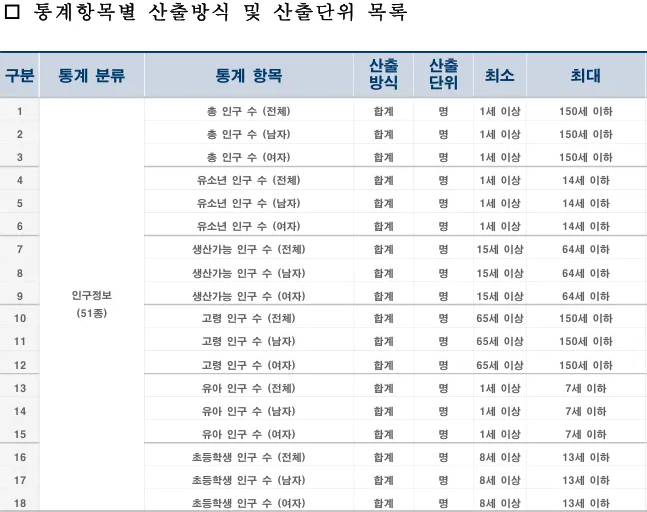

In [ ]:
base1 = '/content/drive/MyDrive/광진구/(B100)국토통계_인구정보-유아 인구 수(전체)-(격자) 100M_서울특별시 광진구_202410/nlsp_021001013.shp'
gdf1 = gpd.read_file(base1, encoding="utf-8")

In [ ]:
gdf1.head()

,gid,lbl,val,geometry
0,다사633494,11.00,11.0,"POLYGON ((963300 1949400, 963300 1949500, 9634..."
1,다사626517,8.00,8.0,"POLYGON ((962600 1951700, 962600 1951800, 9627..."
2,다사642512,13.00,13.0,"POLYGON ((964200 1951200, 964200 1951300, 9643..."
3,다사647489,19.00,19.0,"POLYGON ((964700 1948900, 964700 1949000, 9648..."
4,다사640506,7.00,7.0,"POLYGON ((964000 1950600, 964000 1950700, 9641..."


In [ ]:
gdf1 = gdf1.drop(columns=['lbl'])
gdf1 = gdf1.rename(columns={'val': '202410_기준_유아인구수'})

In [ ]:
gdf1.head()

,gid,202410_기준_유아인구수,geometry
0,다사633494,11.0,"POLYGON ((963300 1949400, 963300 1949500, 9634..."
1,다사626517,8.0,"POLYGON ((962600 1951700, 962600 1951800, 9627..."
2,다사642512,13.0,"POLYGON ((964200 1951200, 964200 1951300, 9643..."
3,다사647489,19.0,"POLYGON ((964700 1948900, 964700 1949000, 9648..."
4,다사640506,7.0,"POLYGON ((964000 1950600, 964000 1950700, 9641..."


## 1-2.40대 인구 수_2024년 10월 기준

In [ ]:
base2 = '/content/drive/MyDrive/광진구/(B100)국토통계_인구정보-40대 인구 수(전체)-(격자) 100M_서울특별시 광진구_202410/nlsp_021001031.shp'
gdf2 = gpd.read_file(base2, encoding="utf-8")

In [ ]:
gdf2.head()

,gid,lbl,val,geometry
0,다사633494,36.00,36.0,"POLYGON ((963300 1949400, 963300 1949500, 9634..."
1,다사626517,35.00,35.0,"POLYGON ((962600 1951700, 962600 1951800, 9627..."
2,다사642512,64.00,64.0,"POLYGON ((964200 1951200, 964200 1951300, 9643..."
3,다사647489,105.00,105.0,"POLYGON ((964700 1948900, 964700 1949000, 9648..."
4,다사640506,67.00,67.0,"POLYGON ((964000 1950600, 964000 1950700, 9641..."


In [ ]:
gdf2 = gdf2.drop(columns=['lbl'])
gdf2 = gdf2.rename(columns={'val': '202410_기준_40대인구수'})

In [ ]:
gdf2.head()

,gid,202410_기준_40대인구수,geometry
0,다사633494,36.0,"POLYGON ((963300 1949400, 963300 1949500, 9634..."
1,다사626517,35.0,"POLYGON ((962600 1951700, 962600 1951800, 9627..."
2,다사642512,64.0,"POLYGON ((964200 1951200, 964200 1951300, 9643..."
3,다사647489,105.0,"POLYGON ((964700 1948900, 964700 1949000, 9648..."
4,다사640506,67.0,"POLYGON ((964000 1950600, 964000 1950700, 9641..."


## 1-3.총 인구수_2024년 10월 기준

In [ ]:
base2_5 = '/content/drive/MyDrive/광진구/(B100)국토통계_인구정보-총 인구 수(전체)-(격자) 100M_서울특별시 광진구_202410/nlsp_021001001.shp'
gdf2_5 = gpd.read_file(base2, encoding="utf-8")

In [ ]:
gdf2_5.head()

,gid,lbl,val,geometry
0,다사633494,36.00,36.0,"POLYGON ((963300 1949400, 963300 1949500, 9634..."
1,다사626517,35.00,35.0,"POLYGON ((962600 1951700, 962600 1951800, 9627..."
2,다사642512,64.00,64.0,"POLYGON ((964200 1951200, 964200 1951300, 9643..."
3,다사647489,105.00,105.0,"POLYGON ((964700 1948900, 964700 1949000, 9648..."
4,다사640506,67.00,67.0,"POLYGON ((964000 1950600, 964000 1950700, 9641..."


In [ ]:
gdf2_5 = gdf2_5.drop(columns=['lbl'])
gdf2_5 = gdf2_5.rename(columns={'val': '202410_기준_총인구수'})

In [ ]:
gdf2_5.head()

,gid,202410_기준_총인구수,geometry
0,다사633494,36.0,"POLYGON ((963300 1949400, 963300 1949500, 9634..."
1,다사626517,35.0,"POLYGON ((962600 1951700, 962600 1951800, 9627..."
2,다사642512,64.0,"POLYGON ((964200 1951200, 964200 1951300, 9643..."
3,다사647489,105.0,"POLYGON ((964700 1948900, 964700 1949000, 9648..."
4,다사640506,67.0,"POLYGON ((964000 1950600, 964000 1950700, 9641..."


## 1-4.공시지가_2023년 07월 기준

In [ ]:
base3 = '/content/drive/MyDrive/광진구/(B100)국토통계_공시지가-공시지가-(격자) 100M_서울특별시 광진구_202307/nlsp_021004001.shp'
gdf3 = gpd.read_file(base3, encoding="utf-8")

In [ ]:
gdf3.head()

,gid,lbl,val,geometry
0,다사629496,5658798.87,5658798.87,"POLYGON ((962900 1949600, 962900 1949700, 9630..."
1,다사636494,4395647.73,4395647.73,"POLYGON ((963600 1949400, 963600 1949500, 9637..."
2,다사631522,4666306.89,4666306.89,"POLYGON ((963100 1952200, 963100 1952300, 9632..."
3,다사633482,5494202.34,5494202.34,"POLYGON ((963300 1948200, 963300 1948300, 9634..."
4,다사633494,5025756.09,5025756.09,"POLYGON ((963300 1949400, 963300 1949500, 9634..."


In [ ]:
gdf3 = gdf3.drop(columns=['lbl'])
gdf3 = gdf3.rename(columns={'val': '202307_기준_공시지가'})

In [ ]:
gdf3.head()

,gid,202307_기준_공시지가,geometry
0,다사629496,5658798.87,"POLYGON ((962900 1949600, 962900 1949700, 9630..."
1,다사636494,4395647.73,"POLYGON ((963600 1949400, 963600 1949500, 9637..."
2,다사631522,4666306.89,"POLYGON ((963100 1952200, 963100 1952300, 9632..."
3,다사633482,5494202.34,"POLYGON ((963300 1948200, 963300 1948300, 9634..."
4,다사633494,5025756.09,"POLYGON ((963300 1949400, 963300 1949500, 9634..."


## 1-5.병합

In [ ]:
gdf2 = gdf2.drop(columns=['geometry'])
gdf3 = gdf3.drop(columns=['geometry'])

In [ ]:
gdf2_5 = gdf2_5.drop(columns=['geometry'])

In [ ]:
m_gdf1 = gdf1.merge(gdf2, on='gid', how='outer')
m_gdf1 = m_gdf1.merge(gdf3, on='gid', how='outer')

In [ ]:
m_gdf1 = m_gdf1.merge(gdf2_5, on='gid', how='outer')

In [ ]:
m_gdf1

,gid,202410_기준_유아인구수,geometry,202410_기준_40대인구수,202307_기준_공시지가,202410_기준_총인구수
0,다사607477,NaN,"POLYGON ((960700 1947700, 960700 1947800, 9608...",NaN,NaN,NaN
1,다사608477,NaN,"POLYGON ((960800 1947700, 960800 1947800, 9609...",NaN,NaN,NaN
2,다사608478,NaN,"POLYGON ((960800 1947800, 960800 1947900, 9609...",NaN,NaN,NaN
3,다사608479,NaN,"POLYGON ((960800 1947900, 960800 1948000, 9609...",NaN,NaN,NaN
4,다사608480,NaN,"POLYGON ((960800 1948000, 960800 1948100, 9609...",NaN,NaN,NaN
...,...,...,...,...,...,...
1807,다사659506,NaN,"POLYGON ((965900 1950600, 965900 1950700, 9660...",NaN,NaN,NaN
1808,다사659507,NaN,"POLYGON ((965900 1950700, 965900 1950800, 9660...",NaN,446599.97,NaN
1809,다사659508,NaN,"POLYGON ((965900 1950800, 965900 1950900, 9660...",NaN,446599.86,NaN
1810,다사659509,NaN,"POLYGON ((965900 1950900, 965900 1951000, 9660...",NaN,NaN,NaN


In [ ]:
m_gdf1.isnull().sum()

,0
gid,0
202410_기준_유아인구수,964
geometry,0
202410_기준_40대인구수,852
202307_기준_공시지가,492
202410_기준_총인구수,852


### 1-5-1. 파일 내보내기

In [ ]:
m_gdf1.to_csv("유아_40대_공시지가_격자데이터.csv", index=False, encoding="utf-8-sig")

In [ ]:
# 오류나는 행
# m_gdf1.to_file("유아_40대_공시지가_격자데이터.shp", encoding="euc-kr")

# 2.상권/행정동

## 2-1.상권

### 2-1-1.상권 geometry

In [ ]:
base4 = '/content/drive/MyDrive/광진구/서울시 상권분석서비스(영역-상권)/서울시 상권분석서비스(영역-상권).shp'
gdf4 = gpd.read_file(base4, encoding="utf-8")

In [ ]:
gdf4 = gdf4[gdf4["SIGNGU_CD_"] == "광진구"]

In [ ]:
gdf4

,TRDAR_SE_C,TRDAR_SE_1,TRDAR_CD,TRDAR_CD_N,XCNTS_VALU,YDNTS_VALU,SIGNGU_CD,SIGNGU_CD_,ADSTRD_CD,ADSTRD_CD_,RELM_AR,geometry
254,A,골목상권,3110157,자양동우체국,207135.0,447836.0,11215,광진구,11215830,자양2동,115158.0,"POLYGON ((207235.236 447999.918, 207257.673 44..."
255,R,전통시장,3130076,능동로골목시장,205916.0,448409.0,11215,광진구,11215847,자양4동,28990.0,"POLYGON ((206008.3 448438.49, 206046.748 44842..."
256,R,전통시장,3130075,노룬산시장(노룬산골목시장),205724.0,448577.0,11215,광진구,11215847,자양4동,10816.0,"POLYGON ((205783.715 448520.549, 205781.148 44..."
257,R,전통시장,3130074,영동교골목시장,205643.0,448742.0,11215,광진구,11215847,자양4동,14261.0,"MULTIPOLYGON (((205738.964 448671.652, 205742...."
258,R,전통시장,3130084,신성시장(신성골목시장),207823.0,450945.0,11215,광진구,11215770,중곡4동,16181.0,"POLYGON ((207778.408 451014.65, 207804.563 450..."
...,...,...,...,...,...,...,...,...,...,...,...,...
311,A,골목상권,3110170,동대부여고,207834.0,449143.0,11215,광진구,11215850,구의1동,120727.0,"POLYGON ((207944.956 449116.073, 207934.167 44..."
312,A,골목상권,3110171,중곡4동주민센터,207882.0,451145.0,11215,광진구,11215770,중곡4동,47879.0,"POLYGON ((207931.425 451228.672, 207933.167 45..."
313,A,골목상권,3110172,광진초등학교,207912.0,449734.0,11215,광진구,11215860,구의2동,95499.0,"POLYGON ((208232.753 449934.077, 208234.587 44..."
314,A,골목상권,3110173,구남초등학교,208034.0,448444.0,11215,광진구,11215870,구의3동,49267.0,"POLYGON ((208031.772 448510.59, 208036.699 448..."


### 2-1-2.상권_폐업

In [ ]:
sang_change = pd.read_csv('/content/drive/MyDrive/광진구/서울시 상권분석서비스(상권변화지표-상권).csv', encoding='cp949')

In [ ]:
sang_change

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,상권_변화_지표,상권_변화_지표_명,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균
0,20192,A,골목상권,3110008,배화여자대학교(박노수미술관),LH,상권확장,60,49,93,49
1,20193,A,골목상권,3110008,배화여자대학교(박노수미술관),LL,다이나믹,66,47,92,48
2,20194,A,골목상권,3110008,배화여자대학교(박노수미술관),LL,다이나믹,68,47,92,48
3,20201,A,골목상권,3110008,배화여자대학교(박노수미술관),LL,다이나믹,68,47,92,48
4,20202,A,골목상권,3110008,배화여자대학교(박노수미술관),LL,다이나믹,69,47,92,49
...,...,...,...,...,...,...,...,...,...,...,...
39595,20242,U,관광특구,3001494,종로?청계 관광특구,HH,정체,161,72,105,52
39596,20241,U,관광특구,3001495,잠실 관광특구,LL,다이나믹,89,50,103,52
39597,20243,U,관광특구,3001495,잠실 관광특구,LL,다이나믹,93,51,107,52
39598,20242,U,관광특구,3001495,잠실 관광특구,LL,다이나믹,91,51,105,52


#### 최근 2년 데이터만 사용


In [ ]:
# 최근 2년 데이터만 사용
use_period = ['20244', '20243', '20242', '20241', '20234', '20233', '20232', '20231']

In [ ]:
sang = sang_change[sang_change["기준_년분기_코드"].astype(str).isin(use_period)]

In [ ]:
'''num_sang = sang_2yrs.groupby('행정동_코드_명').agg(
    운영_영업_개월_평균=('운영_영업_개월_평균', 'mean'),
    폐업_영업_개월_평균=('폐업_영업_개월_평균', 'mean'),
    월_평균_소득_금액=('월_평균_소득_금액', 'mean'),
    지출_총금액=('지출_총금액', 'mean'),
    식료품_지출_총금액=('식료품_지출_총금액', 'mean'),
    의류_신발_지출_총금액=('의류_신발_지출_총금액', 'mean'),
    생활용품_지출_총금액=('생활용품_지출_총금액', 'mean'),
    의료비_지출_총금액=('의료비_지출_총금액', 'mean'),
    교통_지출_총금액=('교통_지출_총금액', 'mean'),
    교육_지출_총금액=('교육_지출_총금액', 'mean'),
    유흥_지출_총금액=('유흥_지출_총금액', 'mean'),
    여가_지출_총금액=('여가_지출_총금액', 'mean'),
    문화_지출_총금액=('문화_지출_총금액', 'mean')
)'''
sang = sang.groupby(['상권_코드', '상권_코드_명']).agg(폐업_영업_개월_평균=('폐업_영업_개월_평균', 'mean'))

In [ ]:
sang = sang.reset_index()

In [ ]:
sang.columns = ["TRDAR_CD", "TRDAR_CD_N", "폐업_영업_개월_평균"]

In [ ]:
sang["TRDAR_CD"] = sang["TRDAR_CD"].astype(str)

#### 병합

In [ ]:
m_sang = gdf4.merge(sang, on=["TRDAR_CD", "TRDAR_CD_N"], how="left")

In [ ]:
m_sang

,TRDAR_SE_C,TRDAR_SE_1,TRDAR_CD,TRDAR_CD_N,XCNTS_VALU,YDNTS_VALU,SIGNGU_CD,SIGNGU_CD_,ADSTRD_CD,ADSTRD_CD_,RELM_AR,geometry,폐업_영업_개월_평균
0,A,골목상권,3110157,자양동우체국,207135.0,447836.0,11215,광진구,11215830,자양2동,115158.0,"POLYGON ((207235.236 447999.918, 207257.673 44...",49.875
1,R,전통시장,3130076,능동로골목시장,205916.0,448409.0,11215,광진구,11215847,자양4동,28990.0,"POLYGON ((206008.3 448438.49, 206046.748 44842...",47.125
2,R,전통시장,3130075,노룬산시장(노룬산골목시장),205724.0,448577.0,11215,광진구,11215847,자양4동,10816.0,"POLYGON ((205783.715 448520.549, 205781.148 44...",57.375
3,R,전통시장,3130074,영동교골목시장,205643.0,448742.0,11215,광진구,11215847,자양4동,14261.0,"MULTIPOLYGON (((205738.964 448671.652, 205742....",47.125
4,R,전통시장,3130084,신성시장(신성골목시장),207823.0,450945.0,11215,광진구,11215770,중곡4동,16181.0,"POLYGON ((207778.408 451014.65, 207804.563 450...",62.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,A,골목상권,3110170,동대부여고,207834.0,449143.0,11215,광진구,11215850,구의1동,120727.0,"POLYGON ((207944.956 449116.073, 207934.167 44...",43.625
58,A,골목상권,3110171,중곡4동주민센터,207882.0,451145.0,11215,광진구,11215770,중곡4동,47879.0,"POLYGON ((207931.425 451228.672, 207933.167 45...",56.250
59,A,골목상권,3110172,광진초등학교,207912.0,449734.0,11215,광진구,11215860,구의2동,95499.0,"POLYGON ((208232.753 449934.077, 208234.587 44...",58.500
60,A,골목상권,3110173,구남초등학교,208034.0,448444.0,11215,광진구,11215870,구의3동,49267.0,"POLYGON ((208031.772 448510.59, 208036.699 448...",51.125


In [ ]:
columns_to_drop = ["TRDAR_SE_C", "TRDAR_SE_1", "TRDAR_CD", "TRDAR_CD_N", "XCNTS_VALU", "YDNTS_VALU", "SIGNGU_CD", "SIGNGU_CD_", "RELM_AR"]
m_sang = m_sang.drop(columns=columns_to_drop)

### 2-1-3.상권 데이터, 격자데이터 병합

#### 좌표계 확인 및 일치시키기

In [ ]:
print(m_gdf1.crs)
print(m_sang.crs)

EPSG:5179
PROJCS["Korea_2000_Korea_Central_Belt",GEOGCS["GCS_Korea_2000",DATUM["Korean_Geodetic_Datum_2002",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6737"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",38],PARAMETER["central_meridian",127],PARAMETER["scale_factor",1],PARAMETER["false_easting",200000],PARAMETER["false_northing",500000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [ ]:
m_sang = m_sang.to_crs(epsg=5179)

In [ ]:
print(m_gdf1.crs)
print(m_sang.crs)

EPSG:5179
EPSG:5179


#### 상권 데이터는 상권의 중심으로 좌표 설정

In [ ]:
m_sang2 = m_sang.copy()

In [ ]:
m_sang2["centroid"] = m_sang2.geometry.centroid

In [ ]:
m_sang2 = m_sang2.set_geometry("centroid")

#### 상권 중심 좌표가 속한 격자데이터를 기준으로 병합

In [ ]:
m_gdf2 = gpd.sjoin(m_gdf1, m_sang2, how="left", predicate="contains")

In [ ]:
m_gdf2

,gid,202410_기준_유아인구수,geometry,202410_기준_40대인구수,202307_기준_공시지가,202410_기준_총인구수,index_right,ADSTRD_CD,ADSTRD_CD_,geometry_right,폐업_영업_개월_평균
0,다사607477,NaN,"POLYGON ((960700 1947700, 960700 1947800, 9608...",NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
1,다사608477,NaN,"POLYGON ((960800 1947700, 960800 1947800, 9609...",NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,다사608478,NaN,"POLYGON ((960800 1947800, 960800 1947900, 9609...",NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,다사608479,NaN,"POLYGON ((960800 1947900, 960800 1948000, 9609...",NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,다사608480,NaN,"POLYGON ((960800 1948000, 960800 1948100, 9609...",NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1807,다사659506,NaN,"POLYGON ((965900 1950600, 965900 1950700, 9660...",NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
1808,다사659507,NaN,"POLYGON ((965900 1950700, 965900 1950800, 9660...",NaN,446599.97,NaN,NaN,NaN,NaN,None,NaN
1809,다사659508,NaN,"POLYGON ((965900 1950800, 965900 1950900, 9660...",NaN,446599.86,NaN,NaN,NaN,NaN,None,NaN
1810,다사659509,NaN,"POLYGON ((965900 1950900, 965900 1951000, 9660...",NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


#### 한 격자에 두 개의 상권 중심

In [ ]:
m_gdf2[m_gdf2.duplicated('gid', keep=False)]

,gid,202410_기준_유아인구수,geometry,202410_기준_40대인구수,202307_기준_공시지가,202410_기준_총인구수,index_right,ADSTRD_CD_,geometry_right,폐업_영업_개월_평균
213,다사619494,0.0,"POLYGON ((961900 1949400, 961900 1949500, 9620...",39.0,5370320.36,39.0,9.0,화양동,"POLYGON ((962046.842 1949438.269, 962046.957 1...",59.250
213,다사619494,0.0,"POLYGON ((961900 1949400, 961900 1949500, 9620...",39.0,5370320.36,39.0,10.0,화양동,"POLYGON ((961958.914 1949544.401, 961960.395 1...",50.125


#### 두 개의 상권은 평균으로 데이터 대체

In [ ]:
avg_sang = m_gdf2.groupby('gid')['폐업_영업_개월_평균'].mean().reset_index()

In [ ]:
m_gdf3 = m_gdf2.drop(columns=['폐업_영업_개월_평균'])

In [ ]:
m_gdf3 = m_gdf3.merge(avg_sang, on='gid', how='left')

In [ ]:
m_gdf3

,gid,202410_기준_유아인구수,geometry,202410_기준_40대인구수,202307_기준_공시지가,202410_기준_총인구수,index_right,ADSTRD_CD_,geometry_right,폐업_영업_개월_평균
0,다사607477,NaN,"POLYGON ((960700 1947700, 960700 1947800, 9608...",NaN,NaN,NaN,NaN,NaN,None,NaN
1,다사608477,NaN,"POLYGON ((960800 1947700, 960800 1947800, 9609...",NaN,NaN,NaN,NaN,NaN,None,NaN
2,다사608478,NaN,"POLYGON ((960800 1947800, 960800 1947900, 9609...",NaN,NaN,NaN,NaN,NaN,None,NaN
3,다사608479,NaN,"POLYGON ((960800 1947900, 960800 1948000, 9609...",NaN,NaN,NaN,NaN,NaN,None,NaN
4,다사608480,NaN,"POLYGON ((960800 1948000, 960800 1948100, 9609...",NaN,NaN,NaN,NaN,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...
1808,다사659506,NaN,"POLYGON ((965900 1950600, 965900 1950700, 9660...",NaN,NaN,NaN,NaN,NaN,None,NaN
1809,다사659507,NaN,"POLYGON ((965900 1950700, 965900 1950800, 9660...",NaN,446599.97,NaN,NaN,NaN,None,NaN
1810,다사659508,NaN,"POLYGON ((965900 1950800, 965900 1950900, 9660...",NaN,446599.86,NaN,NaN,NaN,None,NaN
1811,다사659509,NaN,"POLYGON ((965900 1950900, 965900 1951000, 9660...",NaN,NaN,NaN,NaN,NaN,None,NaN


#### 평균으로 들어갔는지 확인 및 중복 건 하나 없애기

In [ ]:
m_gdf3[m_gdf3.duplicated('gid', keep=False)]

,gid,202410_기준_유아인구수,geometry,202410_기준_40대인구수,202307_기준_공시지가,202410_기준_총인구수,index_right,ADSTRD_CD_,geometry_right,폐업_영업_개월_평균
213,다사619494,0.0,"POLYGON ((961900 1949400, 961900 1949500, 9620...",39.0,5370320.36,39.0,9.0,화양동,"POLYGON ((962046.842 1949438.269, 962046.957 1...",54.6875
214,다사619494,0.0,"POLYGON ((961900 1949400, 961900 1949500, 9620...",39.0,5370320.36,39.0,10.0,화양동,"POLYGON ((961958.914 1949544.401, 961960.395 1...",54.6875


In [ ]:
m_gdf3 = m_gdf3.drop_duplicates(subset='gid', keep='first')

In [ ]:
m_gdf3

,gid,202410_기준_유아인구수,geometry,202410_기준_40대인구수,202307_기준_공시지가,202410_기준_총인구수,index_right,ADSTRD_CD_,geometry_right,폐업_영업_개월_평균
0,다사607477,NaN,"POLYGON ((960700 1947700, 960700 1947800, 9608...",NaN,NaN,NaN,NaN,NaN,None,NaN
1,다사608477,NaN,"POLYGON ((960800 1947700, 960800 1947800, 9609...",NaN,NaN,NaN,NaN,NaN,None,NaN
2,다사608478,NaN,"POLYGON ((960800 1947800, 960800 1947900, 9609...",NaN,NaN,NaN,NaN,NaN,None,NaN
3,다사608479,NaN,"POLYGON ((960800 1947900, 960800 1948000, 9609...",NaN,NaN,NaN,NaN,NaN,None,NaN
4,다사608480,NaN,"POLYGON ((960800 1948000, 960800 1948100, 9609...",NaN,NaN,NaN,NaN,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...
1808,다사659506,NaN,"POLYGON ((965900 1950600, 965900 1950700, 9660...",NaN,NaN,NaN,NaN,NaN,None,NaN
1809,다사659507,NaN,"POLYGON ((965900 1950700, 965900 1950800, 9660...",NaN,446599.97,NaN,NaN,NaN,None,NaN
1810,다사659508,NaN,"POLYGON ((965900 1950800, 965900 1950900, 9660...",NaN,446599.86,NaN,NaN,NaN,None,NaN
1811,다사659509,NaN,"POLYGON ((965900 1950900, 965900 1951000, 9660...",NaN,NaN,NaN,NaN,NaN,None,NaN


In [ ]:
m_gdf3 = m_gdf3.drop(columns=["index_right", "geometry_right"])

#### 파일 내보내기

In [ ]:
# m_gdf3.to_csv("상권추가.csv", index=False, encoding="utf-8-sig")

## 2-2.행정동

### 2-2-1.행정동 geometry

In [ ]:
base5 = '/content/drive/MyDrive/광진구/서울시 상권분석서비스(영역-행정동)/서울시 상권분석서비스(영역-행정동).shp'
gdf5 = gpd.read_file(base5, encoding="utf-8")

In [ ]:
# 광진구 행정동
gwang = ['광장동', '구의1동', '구의2동', '구의3동', '군자동', '능동',
        '자양1동', '자양2동', '자양3동', '자양4동', '중곡1동', '중곡2동',
        '중곡3동', '중곡4동', '화양동']

In [ ]:
gdf5 = gdf5[gdf5['ADSTRD_NM'].isin(gwang)].copy()

In [ ]:
gdf5

,ADSTRD_CD,ADSTRD_NM,XCNTS_VALU,YDNTS_VALU,RELM_AR,geometry
58,11215840,자양3동,206277.0,447988.0,1196419.0,"POLYGON ((206502.191 448833.47, 206557.876 448..."
59,11215847,자양4동,205623.0,448252.0,1180023.0,"POLYGON ((206164.104 448956.578, 206210.11 448..."
60,11215850,구의1동,207599.0,449114.0,565313.0,"POLYGON ((207972.337 449261.113, 207965.893 44..."
61,11215860,구의2동,208382.0,450180.0,1388041.0,"POLYGON ((209270.675 450767.066, 209269.698 45..."
62,11215870,구의3동,208328.0,448610.0,1027561.0,"POLYGON ((208172.878 449404.42, 208188.854 449..."
111,11215710,화양동,206486.0,449309.0,1166008.0,"POLYGON ((206227.001 449833.195, 206236.125 44..."
112,11215730,군자동,206513.0,450394.0,738025.0,"POLYGON ((207001.484 450802.871, 206989.732 45..."
113,11215740,중곡1동,206864.0,451399.0,614505.0,"POLYGON ((207024.303 450852.62, 207024.085 450..."
114,11215750,중곡2동,207473.0,451046.0,545542.0,"POLYGON ((207575.037 451541.845, 207575.275 45..."
115,11215760,중곡3동,207246.0,452045.0,601866.0,"POLYGON ((207121.904 452457.909, 207124.827 45..."


### 2-2-2.행정동_소득소비

In [ ]:
hang_income = pd.read_csv('/content/drive/MyDrive/광진구/서울시 상권분석서비스(소득소비-행정동).csv', encoding='cp949')

In [ ]:
hang_income

,기준_년분기_코드,행정동_코드,행정동_코드_명,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,교육_지출_총금액,유흥_지출_총금액,여가_문화_지출_총금액,기타_지출_총금액,음식_지출_총금액
0,20241,11320515,창5동,3298026,7,2022667000,400614000,34672000,20169000,510531000,81976000,242517000,46100000,134954000,109929000,441205000
1,20191,11110530,사직동,5208463,9,31889341000,1238314000,158974000,60281000,586427000,188458000,169234000,293797000,1241791000,23670438000,4281627000
2,20191,11110615,종로1?2?3?4가동,3350350,7,77584610000,3618998000,7478066000,861970000,4123252000,3236609000,2062644000,2398515000,13520753000,23729021000,16554782000
3,20191,11110650,혜화동,3472006,7,7826497000,1354887000,215665000,77222000,1129580000,20145000,195279000,415196000,565923000,361926000,3490674000
4,20191,11110680,창신2동,2179485,5,670987000,143195000,23323000,11149000,142754000,945000,0,17411000,32513000,18104000,281593000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,20243,11620735,대학동,2622408,6,2565461000,1082769000,14441000,3555000,306314000,1830000,73136000,83938000,125324000,80517000,793637000
10196,20243,11650570,반포2동,6812331,9,591390000,170387000,1136000,0,89215000,3507000,151776000,0,24476000,18836000,132057000
10197,20243,11650590,방배본동,4856162,8,6368143000,337715000,38519000,50812000,343531000,198834000,129994000,21332000,135738000,4685978000,425690000
10198,20243,11680640,역삼1동,3607265,7,462852749000,2875360000,1065433000,347696000,10855447000,217119000,2313910000,1022743000,376215448000,60753193000,7186400000


#### 최근 2년 데이터만 사용

In [ ]:
hang = hang_income[hang_income["기준_년분기_코드"].astype(str).isin(use_period)]

In [ ]:
num_hang = hang.groupby('행정동_코드_명').agg(
    월_평균_소득_금액=('월_평균_소득_금액', 'mean'),
    지출_총금액=('지출_총금액', 'mean'),
    교육_지출_총금액=('교육_지출_총금액', 'mean')
)

In [ ]:
cate_hang = hang.groupby(['행정동_코드_명', '소득_구간_코드']).size().reset_index(name='개수')

In [ ]:
hang1 = num_hang.merge(cate_hang, on=["행정동_코드_명"], how="outer")

In [ ]:
m_hang = gdf5.merge(hang1, left_on=["ADSTRD_NM"], right_on="행정동_코드_명", how="left")

In [ ]:
m_hang = m_hang.drop(columns=[ "ADSTRD_NM", "XCNTS_VALU", "YDNTS_VALU", "RELM_AR","행정동_코드_명", "개수"])

In [ ]:
m_hang

,ADSTRD_CD,geometry,월_평균_소득_금액,지출_총금액,교육_지출_총금액,소득_구간_코드
0,11215840,"POLYGON ((206502.191 448833.47, 206557.876 448...",4353416.0,4.396385e+09,363028750.0,8
1,11215847,"POLYGON ((206164.104 448956.578, 206210.11 448...",2795134.0,6.924237e+09,88945625.0,6
2,11215850,"POLYGON ((207972.337 449261.113, 207965.893 44...",2683701.0,3.992565e+09,55460875.0,6
3,11215860,"POLYGON ((209270.675 450767.066, 209269.698 45...",2948328.0,3.994814e+09,147568375.0,6
4,11215870,"POLYGON ((208172.878 449404.42, 208188.854 449...",4010979.0,9.671360e+09,670905500.0,8
5,11215710,"POLYGON ((206227.001 449833.195, 206236.125 44...",2470026.0,1.712475e+10,159861750.0,6
6,11215730,"POLYGON ((207001.484 450802.871, 206989.732 45...",2604535.0,5.461690e+09,88785250.0,6
7,11215740,"POLYGON ((207024.303 450852.62, 207024.085 450...",2542359.0,3.877673e+09,35057750.0,6
8,11215750,"POLYGON ((207575.037 451541.845, 207575.275 45...",2555101.0,3.220985e+09,150160375.0,6
9,11215760,"POLYGON ((207121.904 452457.909, 207124.827 45...",2390961.0,2.141596e+09,64228125.0,5


### 2-2-3.행정동 데이터, 격자데이터 병합

#### 좌표계 확인 및 일치시키기

In [ ]:
print(m_gdf3.crs)
print(m_hang.crs)

EPSG:5179
PROJCS["Korea_2000_Korea_Central_Belt",GEOGCS["GCS_Korea_2000",DATUM["Korean_Geodetic_Datum_2002",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6737"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",38],PARAMETER["central_meridian",127],PARAMETER["scale_factor",1],PARAMETER["false_easting",200000],PARAMETER["false_northing",500000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [ ]:
m_hang = m_hang.to_crs(epsg=5179)

In [ ]:
print(m_gdf3.crs)
print(m_hang.crs)

EPSG:5179
EPSG:5179


#### 행정동 데이터는 병합 시, null값이 제일 적은 predicate의 파라미터를 선택

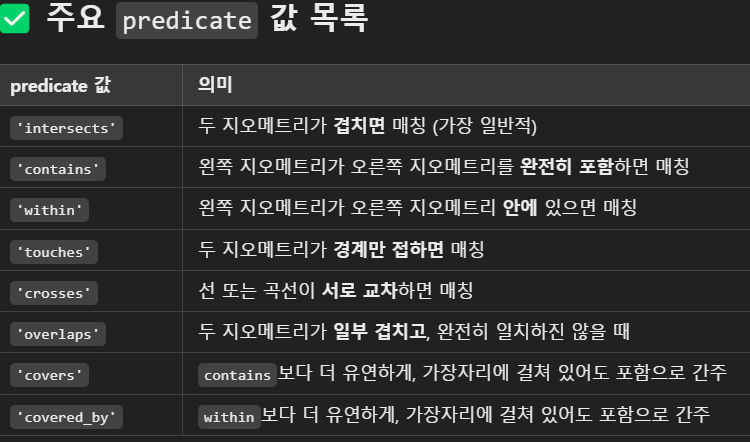

* 행정동은 within을 선택했을 때 제일 null 값이 적었음
* 상권은 중심점 없이 하는 경우로 다시 시도해볼 필요가 있음 -> 일단은 중심점 기준으로 함

In [ ]:
m_gdf4 = gpd.sjoin(m_gdf3, m_hang, how="left", predicate='within')

In [ ]:
m_gdf4

,gid,202410_기준_유아인구수,geometry,202410_기준_40대인구수,202307_기준_공시지가,202410_기준_총인구수,ADSTRD_CD_,폐업_영업_개월_평균,index_right,ADSTRD_CD,월_평균_소득_금액,지출_총금액,교육_지출_총금액,소득_구간_코드
0,다사607477,NaN,"POLYGON ((960700 1947700, 960700 1947800, 9608...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,다사608477,NaN,"POLYGON ((960800 1947700, 960800 1947800, 9609...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,다사608478,NaN,"POLYGON ((960800 1947800, 960800 1947900, 9609...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,다사608479,NaN,"POLYGON ((960800 1947900, 960800 1948000, 9609...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,다사608480,NaN,"POLYGON ((960800 1948000, 960800 1948100, 9609...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1808,다사659506,NaN,"POLYGON ((965900 1950600, 965900 1950700, 9660...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1809,다사659507,NaN,"POLYGON ((965900 1950700, 965900 1950800, 9660...",NaN,446599.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1810,다사659508,NaN,"POLYGON ((965900 1950800, 965900 1950900, 9660...",NaN,446599.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1811,다사659509,NaN,"POLYGON ((965900 1950900, 965900 1951000, 9660...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
m_gdf4.isnull().sum()

,0
gid,0
202410_기준_유아인구수,964
geometry,0
202410_기준_40대인구수,852
202307_기준_공시지가,492
202410_기준_총인구수,852
ADSTRD_CD_,1751
폐업_영업_개월_평균,1751
index_right,527
ADSTRD_CD,527


In [ ]:
m_gdf4 = m_gdf4.drop(columns=["index_right"])

#### 파일 내보내기

In [ ]:
# m_gdf4.to_csv("행정추가.csv", index=False, encoding="utf-8-sig")

# 3.아파트

## 3-1.도로명주소 위경도 좌표 변환

In [ ]:
apt = pd.read_csv("/content/drive/MyDrive/광진구/서울특별시_광진구_아파트정보_20210208.csv", encoding="cp949")

In [ ]:
KAKAO_API_KEY = "af106f5a441ecb6a8c3aac0cf3c61a39"

In [ ]:
def get_lat_lng(address):
    import requests

    url = "https://dapi.kakao.com/v2/local/search/address.json"
    headers = {
        "Authorization": f"KakaoAK af106f5a441ecb6a8c3aac0cf3c61a39"  # 직접 키를 하드코딩해도 돼 (디버깅 시)
    }
    params = {"query": address}

    try:
        response = requests.get(url, headers=headers, params=params, timeout=5)
        if response.status_code == 200:
            result = response.json()
            if result['documents']:
                doc = result['documents'][0]
                location = doc.get('road_address') or doc.get('address')
                if location:
                    return location['y'], location['x']
                else:
                    print(f"[좌표 없음] {address}")
            else:
                print(f"[결과 없음] {address}")
        else:
            print(f"[응답 오류] {response.status_code} | {response.text}")
    except Exception as e:
        print(f"[예외] {address} → {e}")

    return None, None


In [ ]:
lat_list = []
lng_list = []

for addr in apt["아파트소재지"]:
    lat, lng = get_lat_lng(addr)
    lat_list.append(lat)
    lng_list.append(lng)
    print(f"{addr} → 위도: {lat}, 경도: {lng}")
    time.sleep(0.2)

서울특별시 광진구 긴고랑로15길 32 → 위도: 37.5630959697664, 경도: 127.083717677089
서울특별시 광진구 긴고랑로1길 55 → 위도: 37.5667790083924, 경도: 127.078414410781
서울특별시 광진구 동일로72길 17 → 위도: 37.5663539967709, 경도: 127.078973009835
서울특별시 광진구 동일로 459 → 위도: 37.5712053276067, 경도: 127.079626865015
서울특별시 광진구 동일로76가길 17 → 위도: 37.5684646872352, 경도: 127.079349001583
서울특별시 광진구 용마산로 174 → 위도: 37.5685684109405, 경도: 127.086381803739
서울특별시 광진구 자양로26길 71 → 위도: 37.5412876569611, 경도: 127.087837362694
서울특별시 광진구 영화사로16길 43 → 위도: 37.5538354352314, 경도: 127.09734621926
서울특별시 광진구 천호대로 716 → 위도: 37.5482752750724, 경도: 127.093571130276
서울특별시 광진구 천호대로 671 → 위도: 37.5513392358641, 경도: 127.090532462896
서울특별시 광진구 구의강변로 42 → 위도: 37.5355790873762, 경도: 127.092918041614
서울특별시 광진구 구의강변로 94 → 위도: 37.538139372561, 경도: 127.095065017619
서울특별시 광진구 광나루로56길 32 → 위도: 37.537824078736, 경도: 127.096219392344
서울특별시 광진구 광나루로56길 29 → 위도: 37.5369576884242, 경도: 127.096536670188
서울특별시 광진구 구의강변로3가길 39 → 위도: 37.5368269410374, 경도: 127.090991709293
서울특별시 광진구 구의강변로5길 7 → 위도: 37

In [ ]:
apt["위도"] = lat_list
apt["경도"] = lng_list

In [ ]:
apt

,구분,단지명,아파트소재지,지번,동수,세대수,층수,관리사무소연락처,관리사무소팩스,데이터기준일자,위도,경도
0,아파트,삼민,서울특별시 광진구 긴고랑로15길 32,중곡2동609,1,36,6,02-454-6402,02-454-6402,2021-02-08,37.5630959697664,127.083717677089
1,아파트,중곡2차,서울특별시 광진구 긴고랑로1길 55,중곡3동190-26,3,120,5,02-469-2265,NaN,2021-02-08,37.5667790083924,127.078414410781
2,아파트,중곡1차,서울특별시 광진구 동일로72길 17,중곡3동191-77,3,150,5,02-467-1019,02-467-1019,2021-02-08,37.5663539967709,127.078973009835
3,아파트,중곡성원,서울특별시 광진구 동일로 459,중곡3동681,1,91,24,02-492-9505,02-492-9505,2021-02-08,37.5712053276067,127.079626865015
4,아파트,광덕,서울특별시 광진구 동일로76가길 17,중곡3동683,1,55,12,02-461-3582,02-461-3582,2021-02-08,37.5684646872352,127.079349001583
...,...,...,...,...,...,...,...,...,...,...,...,...
90,아파트,더샵스타시티,서울특별시 광진구 아차산로 262,자양3동 227-7,4,1177,58,02-2024-7119,02-2024-7111,2021-02-08,37.5370016363785,127.072962760454
91,아파트,이튼타워리버3차,서울특별시 광진구 능동로 18,자양3동 855,3,260,25,02-461-3270,02-461-3205,2021-02-08,37.532681666917,127.067878953418
92,아파트,래미안구의파크스위트,서울특별시 광진구 광나루로 545,구의2동 668,12,854,23,02-3494-9484,02-3394-9486,2021-02-08,37.5462593168446,127.089943095429
93,아파트,테라팰리스건대1차,서울특별시 광진구 아차산로25길 60,화양동 531,1,54,7,02-462-9917,02-462-9918,2021-02-08,37.5438470682704,127.068143562756


## 3-2.위경도를 geometry로 변환

In [ ]:
apt["geometry"] = apt.apply(lambda row: Point(row["경도"], row["위도"]), axis=1)

In [ ]:
gdf_apt = gpd.GeoDataFrame(apt, geometry="geometry", crs="EPSG:4326")

In [ ]:
m_gdf5 = m_gdf4.copy()

In [ ]:
if m_gdf5.crs != "EPSG:4326":
    m_gdf5 = m_gdf5.to_crs("EPSG:4326")

In [ ]:
m_gdf6 = gpd.sjoin(m_gdf5, gdf_apt, how="left", predicate="intersects")

In [ ]:
m_gdf6.isnull().sum()

,0
gid,0
202410_기준_유아인구수,964
geometry,0
202410_기준_40대인구수,852
202307_기준_공시지가,494
202410_기준_총인구수,852
ADSTRD_CD_,1761
폐업_영업_개월_평균,1761
ADSTRD_CD,527
월_평균_소득_금액,527


In [ ]:
m_gdf6 = m_gdf6.drop(columns=["index_right", "구분", "단지명", "아파트소재지", "지번", "동수", "층수", "관리사무소연락처", "관리사무소팩스", "데이터기준일자", "위도", "경도"])

## 3-3.한 격자에 여러 아파트 sum

In [ ]:
m_gdf6[m_gdf6.duplicated('gid', keep=False)]

,gid,202410_기준_유아인구수,geometry,202410_기준_40대인구수,202307_기준_공시지가,202410_기준_총인구수,ADSTRD_CD_,폐업_영업_개월_평균,ADSTRD_CD,월_평균_소득_금액,지출_총금액,교육_지출_총금액,소득_구간_코드,세대수
95,다사615483,12.0,"POLYGON ((127.06424 37.53321, 127.06423 37.534...",44.0,5726428.22,44.0,NaN,NaN,11215847,2795134.0,6.924237e+09,88945625.0,6.0,158.0
95,다사615483,12.0,"POLYGON ((127.06424 37.53321, 127.06423 37.534...",44.0,5726428.22,44.0,NaN,NaN,11215847,2795134.0,6.924237e+09,88945625.0,6.0,47.0
182,다사618494,14.0,"POLYGON ((127.06758 37.54314, 127.06757 37.544...",59.0,4721866.53,59.0,NaN,NaN,11215710,2470026.0,1.712475e+10,159861750.0,6.0,78.0
182,다사618494,14.0,"POLYGON ((127.06758 37.54314, 127.06757 37.544...",59.0,4721866.53,59.0,NaN,NaN,11215710,2470026.0,1.712475e+10,159861750.0,6.0,54.0
270,다사621482,31.0,"POLYGON ((127.07103 37.53233, 127.07103 37.533...",133.0,6671380.16,133.0,NaN,NaN,11215840,4353416.0,4.396385e+09,363028750.0,8.0,375.0
270,다사621482,31.0,"POLYGON ((127.07103 37.53233, 127.07103 37.533...",133.0,6671380.16,133.0,NaN,NaN,11215840,4353416.0,4.396385e+09,363028750.0,8.0,178.0
309,다사622483,20.0,"POLYGON ((127.07216 37.53324, 127.07216 37.534...",88.0,4875440.11,88.0,NaN,NaN,11215840,4353416.0,4.396385e+09,363028750.0,8.0,257.0
309,다사622483,20.0,"POLYGON ((127.07216 37.53324, 127.07216 37.534...",88.0,4875440.11,88.0,NaN,NaN,11215840,4353416.0,4.396385e+09,363028750.0,8.0,405.0
763,다사631477,30.0,"POLYGON ((127.08238 37.52787, 127.08237 37.528...",139.0,6881785.13,139.0,NaN,NaN,11215830,2999213.0,3.317290e+09,161562375.0,7.0,439.0
763,다사631477,30.0,"POLYGON ((127.08238 37.52787, 127.08237 37.528...",139.0,6881785.13,139.0,NaN,NaN,11215830,2999213.0,3.317290e+09,161562375.0,7.0,182.0


In [ ]:
sum_apt = m_gdf6.groupby('gid')['세대수'].sum().reset_index()

In [ ]:
m_gdf7 = m_gdf5.merge(sum_apt, on='gid', how='left')

In [ ]:
m_gdf7

,gid,202410_기준_유아인구수,geometry,202410_기준_40대인구수,202307_기준_공시지가,202410_기준_총인구수,ADSTRD_CD_,폐업_영업_개월_평균,ADSTRD_CD,월_평균_소득_금액,지출_총금액,교육_지출_총금액,소득_구간_코드,세대수
0,다사607477,NaN,"POLYGON ((127.05522 37.52777, 127.05521 37.528...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,다사608477,NaN,"POLYGON ((127.05635 37.52777, 127.05634 37.528...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,다사608478,NaN,"POLYGON ((127.05634 37.52867, 127.05634 37.529...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,다사608479,NaN,"POLYGON ((127.05634 37.52958, 127.05633 37.530...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,다사608480,NaN,"POLYGON ((127.05633 37.53048, 127.05633 37.531...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,다사659506,NaN,"POLYGON ((127.11393 37.55411, 127.11393 37.555...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1808,다사659507,NaN,"POLYGON ((127.11393 37.55502, 127.11392 37.555...",NaN,446599.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1809,다사659508,NaN,"POLYGON ((127.11392 37.55592, 127.11392 37.556...",NaN,446599.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1810,다사659509,NaN,"POLYGON ((127.11392 37.55682, 127.11391 37.557...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
m_gdf7['세대수'] = m_gdf7['세대수'].replace(0.0, np.nan)

In [ ]:
m_gdf7.isnull().sum()

,0
gid,0
202410_기준_유아인구수,964
geometry,0
202410_기준_40대인구수,852
202307_기준_공시지가,492
202410_기준_총인구수,852
ADSTRD_CD_,1751
폐업_영업_개월_평균,1751
ADSTRD_CD,527
월_평균_소득_금액,527


## 3-4.파일 내보내기

In [ ]:
# m_gdf7.to_csv("아파트_세대수 추가.csv", index=False, encoding="utf-8-sig")

# 4.쇼핑몰

In [ ]:
shop = pd.read_csv("/content/drive/MyDrive/광진구/서울시광진구대규모점포인허가정보.csv", encoding="cp949")

In [ ]:
shop = shop[shop['상세영업상태명'] == '정상영업']

In [ ]:
shop

,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,휴업시작일자,...,도로명주소,도로명우편번호,사업장명,최종수정일자,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),점포구분명
0,3040000,2.001300e+18,1970-12-23,NaN,1,영업/정상,1,정상영업,NaN,NaN,...,서울특별시 광진구 뚝섬로 491 (자양동),143-843,노룬산시장,2013-12-23 16:36,I,59:59.0,그 밖의 대규모점포,205663.0811,448250.3634,대규모점포
1,3040000,2.001300e+18,1971-05-01,NaN,1,영업/정상,1,정상영업,NaN,NaN,...,서울특별시 광진구 아차산로30길 39 (자양동),143-841,조양시장,2017-12-08 10:38,I,59:59.0,그 밖의 대규모점포,205886.2890,448517.3386,대규모점포
2,3040000,2.001300e+18,1971-05-08,NaN,1,영업/정상,1,정상영업,NaN,NaN,...,서울특별시 광진구 긴고랑로11길 11 (중곡동),143-903,중곡제일시장,2012-01-04 17:05,I,59:59.0,그 밖의 대규모점포,207114.4989,451296.0494,대규모점포
5,3040000,2.001300e+18,1977-01-31,NaN,1,영업/정상,1,정상영업,NaN,NaN,...,서울특별시 광진구 영화사로 12 (중곡동),143-888,신성종합시장,2012-01-04 16:20,I,59:59.0,그 밖의 대규모점포,207747.8940,450639.2010,대규모점포
7,3040000,2.001300e+18,1979-07-16,NaN,1,영업/정상,1,정상영업,NaN,NaN,...,서울특별시 광진구 자양번영로6길 20 (자양동),143-865,자양종합시장,2014-07-23 19:01,I,59:59.0,그 밖의 대규모점포,206686.3645,447752.4632,대규모점포
8,3040000,2.001300e+18,1980-04-07,NaN,1,영업/정상,1,정상영업,NaN,NaN,...,서울특별시 광진구 능동로13길 39 (화양동),143-914,한아름시장,2023-11-17 10:04,U,40:00.0,그 밖의 대규모점포,206107.7752,449029.3422,대규모점포
9,3040000,2.001300e+18,1980-06-18,NaN,1,영업/정상,1,정상영업,NaN,NaN,...,서울특별시 광진구 능동로47길 30 (중곡동),143-903,광성시장,2012-01-04 14:42,I,59:59.0,그 밖의 대규모점포,207098.9948,451260.4457,대규모점포
10,3040000,2.001300e+18,1989-08-23,NaN,1,영업/정상,1,정상영업,NaN,NaN,...,서울특별시 광진구 강변역로 50 (구의동),143-715,동서울터미널상가,2025-02-14 16:04,U,40:00.0,복합쇼핑몰,208201.9933,447967.2995,대규모점포
11,3040000,2.001300e+18,1990-11-17,NaN,1,영업/정상,1,정상영업,NaN,NaN,...,서울특별시 광진구 광나루로 635 (광장동),143-814,현대종합상가,2012-01-04 16:03,I,59:59.0,그 밖의 대규모점포,208644.8192,448711.7258,대규모점포
12,3040000,2.001300e+18,1992-11-05,NaN,1,영업/정상,1,정상영업,NaN,NaN,...,서울특별시 광진구 광나루로56길 34 (구의동),143-832,구의현대종합상가,2021-08-19 10:13,U,40:00.0,그 밖의 대규모점포,208403.7461,448490.2392,대규모점포


In [ ]:
print(shop.columns.tolist())

['개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자', '영업상태코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자', '재개업일자', '전화번호', '소재지면적', '소재지우편번호', '지번주소', '도로명주소', '도로명우편번호', '사업장명', '최종수정일자', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보(X)', '좌표정보(Y)', '점포구분명']


In [ ]:
shop = shop.drop(columns=['개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자', '영업상태코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자', '재개업일자', '전화번호', '소재지면적', '소재지우편번호', '지번주소', '도로명주소', '도로명우편번호', '최종수정일자', '데이터갱신구분', '데이터갱신일자', '업태구분명',  '점포구분명'])

In [ ]:
shop

,사업장명,좌표정보(X),좌표정보(Y)
0,노룬산시장,205663.0811,448250.3634
1,조양시장,205886.2890,448517.3386
2,중곡제일시장,207114.4989,451296.0494
5,신성종합시장,207747.8940,450639.2010
7,자양종합시장,206686.3645,447752.4632
8,한아름시장,206107.7752,449029.3422
9,광성시장,207098.9948,451260.4457
10,동서울터미널상가,208201.9933,447967.2995
11,현대종합상가,208644.8192,448711.7258
12,구의현대종합상가,208403.7461,448490.2392


In [ ]:
x_min = shop['좌표정보(X)'].min()
x_max = shop['좌표정보(X)'].max()
y_min = shop['좌표정보(Y)'].min()
y_max = shop['좌표정보(Y)'].max()

print(f"X 최소값: {x_min}")
print(f"X 최대값: {x_max}")
print(f"Y 최소값: {y_min}")
print(f"Y 최대값: {y_max}")

X 최소값: 205663.0811
X 최대값: 208644.8192
Y 최소값: 447632.296
Y 최대값: 451296.0494


## 4-1.좌표계 확인

In [ ]:
geometry = [Point(xy) for xy in zip(shop['좌표정보(X)'], shop['좌표정보(Y)'])]

In [ ]:
gdf_shop = gpd.GeoDataFrame(shop, geometry=geometry, crs='EPSG:5181')

In [ ]:
print(gdf_shop.crs)

EPSG:5181


In [ ]:
gdf_shop = gdf_shop.to_crs(epsg=5179)

In [ ]:
gdf_shop

,사업장명,좌표정보(X),좌표정보(Y),geometry
0,노룬산시장,205663.0811,448250.3634,POINT (961485.573 1948358.398)
1,조양시장,205886.2890,448517.3386,POINT (961710.111 1948624.081)
2,중곡제일시장,207114.4989,451296.0494,POINT (962952.606 1951395.158)
5,신성종합시장,207747.8940,450639.2010,POINT (963582.256 1950735.203)
7,자양종합시장,206686.3645,447752.4632,POINT (962505.804 1947855.257)
8,한아름시장,206107.7752,449029.3422,POINT (961934.231 1949134.704)
9,광성시장,207098.9948,451260.4457,POINT (962936.919 1951359.651)
10,동서울터미널상가,208201.9933,447967.2995,POINT (964021.971 1948061.954)
11,현대종합상가,208644.8192,448711.7258,POINT (964468.577 1948803.729)
12,구의현대종합상가,208403.7461,448490.2392,POINT (964226.423 1948583.612)


In [ ]:
m_gdf7 = m_gdf7.to_crs('EPSG:5179')

## 4-2.한 격자에 여러 쇼핑몰

In [ ]:
m_gdf8 = gpd.sjoin(m_gdf7, gdf_shop, how="left", predicate="intersects")

In [ ]:
m_gdf8.isnull().sum()

,0
gid,0
202410_기준_유아인구수,965
geometry,0
202410_기준_40대인구수,853
202307_기준_공시지가,493
202410_기준_총인구수,853
ADSTRD_CD_,1754
폐업_영업_개월_평균,1754
ADSTRD_CD,528
월_평균_소득_금액,528


In [ ]:
m_gdf8[m_gdf8.duplicated('gid', keep=False)]

,gid,202410_기준_유아인구수,geometry,202410_기준_40대인구수,202307_기준_공시지가,202410_기준_총인구수,ADSTRD_CD_,폐업_영업_개월_평균,ADSTRD_CD,월_평균_소득_금액,지출_총금액,교육_지출_총금액,소득_구간_코드,세대수,index_right,사업장명,좌표정보(X),좌표정보(Y)
210,다사619491,0.0,"POLYGON ((961900 1949100, 961900 1949200, 9620...",38.0,10392996.00,38.0,화양동,49.25,NaN,NaN,NaN,NaN,NaN,NaN,8.0,한아름시장,206107.7752,449029.3422
210,다사619491,0.0,"POLYGON ((961900 1949100, 961900 1949200, 9620...",38.0,10392996.00,38.0,화양동,49.25,NaN,NaN,NaN,NaN,NaN,NaN,22.0,(주)지에스리테일GS수퍼 광진화양점,206107.7752,449029.3422
690,다사629513,0.0,"POLYGON ((962900 1951300, 962900 1951400, 9630...",94.0,3393909.72,94.0,NaN,NaN,11215740,2542359.0,3.877673e+09,35057750.0,6.0,NaN,9.0,광성시장,207098.9948,451260.4457
690,다사629513,0.0,"POLYGON ((962900 1951300, 962900 1951400, 9630...",94.0,3393909.72,94.0,NaN,NaN,11215740,2542359.0,3.877673e+09,35057750.0,6.0,NaN,2.0,중곡제일시장,207114.4989,451296.0494
690,다사629513,0.0,"POLYGON ((962900 1951300, 962900 1951400, 9630...",94.0,3393909.72,94.0,NaN,NaN,11215740,2542359.0,3.877673e+09,35057750.0,6.0,NaN,21.0,(주)이마트에브리데이 중곡동점,207114.4989,451296.0494
1311,다사642482,NaN,"POLYGON ((964200 1948200, 964200 1948300, 9643...",NaN,NaN,NaN,NaN,NaN,11215870,4010979.0,9.671360e+09,670905500.0,8.0,NaN,15.0,롯데쇼핑(주)롯데마트 강변점,208394.4164,448165.2800
1311,다사642482,NaN,"POLYGON ((964200 1948200, 964200 1948300, 9643...",NaN,NaN,NaN,NaN,NaN,11215870,4010979.0,9.671360e+09,670905500.0,8.0,NaN,14.0,테크노-마트21,208394.4164,448165.2800


In [ ]:
m_gdf8 = m_gdf8.drop(columns=["index_right", "좌표정보(X)", "좌표정보(Y)"])

In [ ]:
count_shop = m_gdf8.groupby('gid')['사업장명'].count().reset_index()
count_shop = count_shop.rename(columns={'사업장명': '쇼핑몰개수'})

In [ ]:
count_shop

,gid,쇼핑몰개수
0,다사607477,0
1,다사608477,0
2,다사608478,0
3,다사608479,0
4,다사608480,0
...,...,...
1807,다사659506,0
1808,다사659507,0
1809,다사659508,0
1810,다사659509,0


In [ ]:
count_shop['쇼핑몰개수'].sum()

np.int64(26)

In [ ]:
m_gdf9 = m_gdf7.merge(count_shop, on='gid', how='left')

In [ ]:
m_gdf9['쇼핑몰개수'] = m_gdf9['쇼핑몰개수'].replace(0.0, np.nan)

In [ ]:
m_gdf9

,gid,202410_기준_유아인구수,geometry,202410_기준_40대인구수,202307_기준_공시지가,202410_기준_총인구수,ADSTRD_CD_,폐업_영업_개월_평균,ADSTRD_CD,월_평균_소득_금액,지출_총금액,교육_지출_총금액,소득_구간_코드,세대수,쇼핑몰개수
0,다사607477,NaN,"POLYGON ((960700 1947700, 960700 1947800, 9608...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,다사608477,NaN,"POLYGON ((960800 1947700, 960800 1947800, 9609...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,다사608478,NaN,"POLYGON ((960800 1947800, 960800 1947900, 9609...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,다사608479,NaN,"POLYGON ((960800 1947900, 960800 1948000, 9609...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,다사608480,NaN,"POLYGON ((960800 1948000, 960800 1948100, 9609...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,다사659506,NaN,"POLYGON ((965900 1950600, 965900 1950700, 9660...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1808,다사659507,NaN,"POLYGON ((965900 1950700, 965900 1950800, 9660...",NaN,446599.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1809,다사659508,NaN,"POLYGON ((965900 1950800, 965900 1950900, 9660...",NaN,446599.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1810,다사659509,NaN,"POLYGON ((965900 1950900, 965900 1951000, 9660...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4-3.파일 내보내기

In [ ]:
# m_gdf9.to_csv("1-7세, 40대, 총인구수, 상권_폐업, 행정동_소비소득, 아파트_세대수, 쇼핑몰_개수 추가.csv", index=False, encoding="utf-8-sig")

# 5.키즈카페

## 5-1.위경도를 geometry로 변환



In [ ]:
kids=pd.read_csv("/content/drive/MyDrive/광진구/사설키즈카페_주소(카카오+네이버+구글기준).csv")

In [ ]:
kids.head(5)

,가게이름,카테고리,평점,평점건수,리뷰수,주소,지번,수용인원,면적(제곱미터),경도,위도
0,블럭고고,키즈카페,4.0,1.0,1.0,서울 광진구 광나루로 635 3층,광장동 484,20,NaN,127.098826,37.540676
1,데굴데굴키즈파티룸 구의점,"키즈카페,실내놀이터",NaN,NaN,NaN,서울 광진구 아차산로61길 14 2층,구의1동,8,NaN,127.091543,37.539429
2,점핑몬스터 구의점,키즈카페,5.0,5.0,36.0,서울 광진구 광나루로39길 11 구의자이르네 지하1층 B01호,구의2동,103,720.50,127.088778,37.545499
3,캘리클럽유니버스 엔터식스 강변점,키즈카페,5.0,2.0,16.0,서울 광진구 광나루로56길 85 테크노마트21 1층,구의3동,12,80.04,127.095765,37.535699
4,아이점프 군자점,키즈카페,3.0,2.0,1.0,서울 광진구 군자로 85 3층,군자동 345-20,30,200.00,127.070870,37.550751


In [ ]:
kids

,가게이름,카테고리,평점,평점건수,리뷰수,주소,지번,수용인원,면적(제곱미터),경도,위도
0,블럭고고,키즈카페,4.0,1.0,1.0,서울 광진구 광나루로 635 3층,광장동 484,20,NaN,127.098826,37.540676
1,데굴데굴키즈파티룸 구의점,"키즈카페,실내놀이터",NaN,NaN,NaN,서울 광진구 아차산로61길 14 2층,구의1동,8,NaN,127.091543,37.539429
2,점핑몬스터 구의점,키즈카페,5.0,5.0,36.0,서울 광진구 광나루로39길 11 구의자이르네 지하1층 B01호,구의2동,103,720.50,127.088778,37.545499
3,캘리클럽유니버스 엔터식스 강변점,키즈카페,5.0,2.0,16.0,서울 광진구 광나루로56길 85 테크노마트21 1층,구의3동,12,80.04,127.095765,37.535699
4,아이점프 군자점,키즈카페,3.0,2.0,1.0,서울 광진구 군자로 85 3층,군자동 345-20,30,200.00,127.070870,37.550751
5,서울형키즈카페 팔각당점,NaN,NaN,NaN,NaN,NaN,NaN,50,NaN,127.082338,37.549917
6,클래비키즈파크,키즈카페,4.3,6.0,108.0,서울 광진구 광나루로 441 어린이회관 본관 1층,능동 18-11,50,NaN,127.078044,37.546900
7,블럭팡 자양점,키즈카페,0.0,0.0,4.0,서울 광진구 뚝섬로 605 행전빌딩 4층,자양1동,16,NaN,127.077080,37.532973
8,아키블럭,NaN,NaN,NaN,NaN,NaN,자양1동,25,NaN,127.081180,37.531730
9,리틀비틀 자양점,키즈카페,5.0,5.0,7.0,서울 광진구 능동로4길 17 원우상가 2층,자양3동,30,188.00,127.068783,37.533339


In [ ]:
print(kids.columns.tolist())

['가게이름', '카테고리', '평점', '평점건수', '리뷰수', '주소', '지번', '수용인원', '면적(제곱미터)', '경도', '위도']


In [ ]:
kids["geometry"] = apt.apply(lambda row: Point(row["경도"], row["위도"]), axis=1)

In [ ]:
gdf_kids = gpd.GeoDataFrame(kids, geometry="geometry", crs="EPSG:4326")

In [ ]:
m_gdf10 = m_gdf9.copy()

In [ ]:
m_gdf10

,gid,202410_기준_유아인구수,geometry,202410_기준_40대인구수,202307_기준_공시지가,202410_기준_총인구수,ADSTRD_CD_,폐업_영업_개월_평균,ADSTRD_CD,월_평균_소득_금액,지출_총금액,교육_지출_총금액,소득_구간_코드,세대수,쇼핑몰개수
0,다사607477,NaN,"POLYGON ((960700 1947700, 960700 1947800, 9608...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,다사608477,NaN,"POLYGON ((960800 1947700, 960800 1947800, 9609...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,다사608478,NaN,"POLYGON ((960800 1947800, 960800 1947900, 9609...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,다사608479,NaN,"POLYGON ((960800 1947900, 960800 1948000, 9609...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,다사608480,NaN,"POLYGON ((960800 1948000, 960800 1948100, 9609...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,다사659506,NaN,"POLYGON ((965900 1950600, 965900 1950700, 9660...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1808,다사659507,NaN,"POLYGON ((965900 1950700, 965900 1950800, 9660...",NaN,446599.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1809,다사659508,NaN,"POLYGON ((965900 1950800, 965900 1950900, 9660...",NaN,446599.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1810,다사659509,NaN,"POLYGON ((965900 1950900, 965900 1951000, 9660...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
if m_gdf10.crs != "EPSG:4326":
    m_gdf10 = m_gdf10.to_crs("EPSG:4326")

## 5-2.한 격자에 여러 키즈카페

In [ ]:
m_gdf11 = gpd.sjoin(m_gdf10, gdf_kids, how="left", predicate="intersects")

In [ ]:
m_gdf11.isnull().sum()

,0
gid,0
202410_기준_유아인구수,964
geometry,0
202410_기준_40대인구수,852
202307_기준_공시지가,493
202410_기준_총인구수,852
ADSTRD_CD_,1752
폐업_영업_개월_평균,1752
ADSTRD_CD,527
월_평균_소득_금액,527


In [ ]:
m_gdf11 = m_gdf11.drop(columns=['index_right', '카테고리', '평점', '평점건수', '리뷰수', '주소', '지번', '면적(제곱미터)'])

In [ ]:
# 원본 GeoDataFrame이 m_gdf10이라 하면:

# 1. 키즈카페 개수와 총 수용인원 계산
kids_cafe_stats = (
    m_gdf11.groupby('gid')
    .agg(키즈카페개수=('가게이름', 'count'), 총수용인원=('수용인원', 'sum'))
    .reset_index()
)

# 2. 원본 데이터에 병합
m_gdf12 = m_gdf10.merge(kids_cafe_stats, on='gid', how='left')



# 3. gid별로 총수용인원을 모든 행에 채우기 (이미 됐으면 이 줄은 생략 가능)
m_gdf12['총수용인원'] = m_gdf12.groupby('gid')['총수용인원'].transform('first')

In [ ]:
count_kids['키즈카페개수'].sum()

np.int64(19)

In [ ]:
count_kids['총수용인원'].count()

np.int64(1812)

In [ ]:
m_gdf11

,gid,202410_기준_유아인구수,geometry,202410_기준_40대인구수,202307_기준_공시지가,202410_기준_총인구수,ADSTRD_CD_,폐업_영업_개월_평균,ADSTRD_CD,월_평균_소득_금액,지출_총금액,교육_지출_총금액,소득_구간_코드,세대수,쇼핑몰개수,가게이름,수용인원,경도,위도
0,다사607477,NaN,"POLYGON ((127.05522 37.52777, 127.05521 37.528...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,다사608477,NaN,"POLYGON ((127.05635 37.52777, 127.05634 37.528...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,다사608478,NaN,"POLYGON ((127.05634 37.52867, 127.05634 37.529...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,다사608479,NaN,"POLYGON ((127.05634 37.52958, 127.05633 37.530...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,다사608480,NaN,"POLYGON ((127.05633 37.53048, 127.05633 37.531...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,다사659506,NaN,"POLYGON ((127.11393 37.55411, 127.11393 37.555...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1808,다사659507,NaN,"POLYGON ((127.11393 37.55502, 127.11392 37.555...",NaN,446599.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1809,다사659508,NaN,"POLYGON ((127.11392 37.55592, 127.11392 37.556...",NaN,446599.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1810,다사659509,NaN,"POLYGON ((127.11392 37.55682, 127.11391 37.557...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
m_gdf12['키즈카페개수'] = m_gdf12['키즈카페개수'].replace(0.0, np.nan)
m_gdf12['총수용인원'] = m_gdf12['총수용인원'].replace(0.0, np.nan)

In [ ]:
m_gdf12

,gid,202410_기준_유아인구수,geometry,202410_기준_40대인구수,202307_기준_공시지가,202410_기준_총인구수,ADSTRD_CD_,폐업_영업_개월_평균,ADSTRD_CD,월_평균_소득_금액,지출_총금액,교육_지출_총금액,소득_구간_코드,세대수,쇼핑몰개수,키즈카페개수,총수용인원
0,다사607477,NaN,"POLYGON ((127.05522 37.52777, 127.05521 37.528...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,다사608477,NaN,"POLYGON ((127.05635 37.52777, 127.05634 37.528...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,다사608478,NaN,"POLYGON ((127.05634 37.52867, 127.05634 37.529...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,다사608479,NaN,"POLYGON ((127.05634 37.52958, 127.05633 37.530...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,다사608480,NaN,"POLYGON ((127.05633 37.53048, 127.05633 37.531...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,다사659506,NaN,"POLYGON ((127.11393 37.55411, 127.11393 37.555...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1808,다사659507,NaN,"POLYGON ((127.11393 37.55502, 127.11392 37.555...",NaN,446599.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1809,다사659508,NaN,"POLYGON ((127.11392 37.55592, 127.11392 37.556...",NaN,446599.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1810,다사659509,NaN,"POLYGON ((127.11392 37.55682, 127.11391 37.557...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

# '이름' 컬럼에 값이 있는 행만 보기
filtered_df = m_gdf12[m_gdf12['키즈카페개수'].notna()]

print(filtered_df)

           gid  202410_기준_유아인구수  \
587   다사627520              6.0   
641   다사628519              7.0   
644   다사628522              6.0   
647   다사628525             17.0   
855   다사632516             13.0   
967   다사634522             15.0   
987   다사635491              7.0   
1131  다사638486             61.0   
1139  다사638494             13.0   
1148  다사638503             12.0   
1223  다사640485             38.0   
1226  다사640488              0.0   
1237  다사640499             13.0   
1271  다사641487             12.0   
1317  다사642488             39.0   
1360  다사643487             30.0   
1422  다사644505              0.0   

                                               geometry  202410_기준_40대인구수  \
587   POLYGON ((127.07763 37.56661, 127.07763 37.567...              39.0   
641   POLYGON ((127.07877 37.56571, 127.07876 37.566...              44.0   
644   POLYGON ((127.07875 37.56842, 127.07875 37.569...              31.0   
647   POLYGON ((127.07874 37.57112, 127.07873 37.572...      

##5-3.아동 커버율 계산

#6.취약계층 비율 계산

In [ ]:
df1= pd.read_csv('/content/drive/MyDrive/광진구/250401_병합된_데이터.csv')

In [ ]:
m_gdf12.rename(columns={'ADSTRD_CD_': '행정동명'}, inplace=True)

In [ ]:
m_gdf13=pd.merge(m_gdf12, df1, on='행정동명', how='left')

In [ ]:
m_gdf13['행정동기반_취약계층비율'] = m_gdf13['202410_기준_총인구수'] * m_gdf13['취약계층_비율']

In [ ]:
m_gdf13[m_gdf13['행정동기반_취약계층비율'].notna()]

,gid,202410_기준_유아인구수,geometry,202410_기준_40대인구수,202307_기준_공시지가,202410_기준_총인구수,행정동명,폐업_영업_개월_평균_x,ADSTRD_CD,월_평균_소득_금액_x,...,쇼핑몰,어린이집,유치원,초등학교,유해시설,키즈카페_총수용인원,차상위_기초_합,취약계층_비율,기존아동_커버율,행정동기반_취약계층비율
76,다사614485,0.0,"POLYGON ((127.0631 37.53501, 127.06309 37.5359...",26.0,3977370.57,26.0,자양4동,48.8750,11215847,2795134.0,...,3.0,7.0,0.0,0.0,7.0,93.0,1369.0,8.104908,11.698113,210.727606
79,다사614488,0.0,"POLYGON ((127.06308 37.53771, 127.06308 37.538...",19.0,4491042.53,19.0,자양4동,47.1250,11215847,2795134.0,...,3.0,7.0,0.0,0.0,7.0,93.0,1369.0,8.104908,11.698113,153.993251
98,다사615486,0.0,"POLYGON ((127.06422 37.53591, 127.06422 37.536...",14.0,6107287.99,14.0,자양4동,57.3750,11215847,2795134.0,...,3.0,7.0,0.0,0.0,7.0,93.0,1369.0,8.104908,11.698113,113.468711
123,다사616488,0.0,"POLYGON ((127.06534 37.53772, 127.06534 37.538...",33.0,4928295.27,33.0,자양4동,46.0000,11215847,2795134.0,...,3.0,7.0,0.0,0.0,7.0,93.0,1369.0,8.104908,11.698113,267.461962
129,다사616494,0.0,"POLYGON ((127.06531 37.54313, 127.06531 37.544...",39.0,5116735.38,39.0,화양동,44.7500,11215710,2470026.0,...,0.0,5.0,1.0,1.0,12.0,0.0,854.0,3.494844,0.000000,136.298903
145,다사617485,0.0,"POLYGON ((127.06649 37.53502, 127.06649 37.535...",32.0,4123265.86,32.0,자양4동,47.1250,11215847,2795134.0,...,3.0,7.0,0.0,0.0,7.0,93.0,1369.0,8.104908,11.698113,259.357054
149,다사617489,NaN,"POLYGON ((127.06647 37.53863, 127.06647 37.539...",0.0,6827668.13,0.0,자양4동,56.8750,11215847,2795134.0,...,3.0,7.0,0.0,0.0,7.0,93.0,1369.0,8.104908,11.698113,0.000000
171,다사618483,14.0,"POLYGON ((127.06763 37.53322, 127.06763 37.534...",61.0,4767315.28,61.0,자양3동,56.3750,NaN,NaN,...,1.0,12.0,2.0,3.0,1.0,169.0,608.0,2.976016,9.130200,181.536955
185,다사618497,0.0,"POLYGON ((127.06756 37.54584, 127.06756 37.546...",28.0,3988278.77,28.0,화양동,43.5000,11215710,2470026.0,...,0.0,5.0,1.0,1.0,12.0,0.0,854.0,3.494844,0.000000,97.855623
210,다사619491,0.0,"POLYGON ((127.06872 37.54044, 127.06872 37.541...",38.0,10392996.00,38.0,화양동,49.2500,NaN,NaN,...,0.0,5.0,1.0,1.0,12.0,0.0,854.0,3.494844,0.000000,132.804060


In [ ]:
m_gdf13.columns.tolist()

['gid',
 '202410_기준_유아인구수',
 'geometry',
 '202410_기준_40대인구수',
 '202307_기준_공시지가',
 '202410_기준_총인구수',
 '행정동명',
 '폐업_영업_개월_평균_x',
 'ADSTRD_CD',
 '월_평균_소득_금액_x',
 '지출_총금액_x',
 '교육_지출_총금액_x',
 '소득_구간_코드_x',
 '세대수',
 '쇼핑몰개수',
 '키즈카페개수',
 '총수용인원',
 '0_4세',
 '5_9세',
 '30_34세',
 '35_39세',
 '40_44세',
 '0_64세_총합',
 '총합',
 '0_9세',
 '30_39세',
 '0_4세_비율',
 '지역별_0_4세_비율',
 '5_9세_비율',
 '지역별_5_9세_비율',
 '0_9세_비율',
 '지역별_0_9세_비율',
 '30_39세_비율',
 '지역별_30_39세_비율',
 '40_44세_비율',
 '지역별_40_44세_비율',
 '총_유동인구_수',
 '남성_유동인구_수',
 '여성_유동인구_수',
 '연령대_10_유동인구_수',
 '연령대_30_유동인구_수',
 '연령대_40_유동인구_수',
 '시간대_00_06_유동인구_수',
 '시간대_06_11_유동인구_수',
 '시간대_11_14_유동인구_수',
 '시간대_14_17_유동인구_수',
 '시간대_17_21_유동인구_수',
 '시간대_21_24_유동인구_수',
 '월요일_유동인구_수',
 '화요일_유동인구_수',
 '수요일_유동인구_수',
 '목요일_유동인구_수',
 '금요일_유동인구_수',
 '토요일_유동인구_수',
 '일요일_유동인구_수',
 '운영_영업_개월_평균',
 '폐업_영업_개월_평균_y',
 '총_상주인구_수',
 '남성_상주인구_수',
 '여성_상주인구_수',
 '연령대_10_상주인구_수',
 '연령대_30_상주인구_수',
 '연령대_40_상주인구_수',
 '남성연령대_10_상주인구_수',
 '남성연령대_30_상주인구_수',
 '남성연령대_40_상주인구_수',
 '여성연

In [ ]:
columns_to_drop_1 = ['0_4세',
 '5_9세',
 '30_34세',
 '35_39세',
 '40_44세',
 '0_64세_총합',
 '총합',
 '0_9세',
 '30_39세',
 '0_4세_비율',
 '지역별_0_4세_비율',
 '5_9세_비율',
 '지역별_5_9세_비율',
 '0_9세_비율',
 '지역별_0_9세_비율',
 '30_39세_비율',
 '지역별_30_39세_비율',
 '40_44세_비율',
 '지역별_40_44세_비율',
 '총_유동인구_수',
 '남성_유동인구_수',
 '여성_유동인구_수',
 '연령대_10_유동인구_수',
 '연령대_30_유동인구_수',
 '연령대_40_유동인구_수',
 '시간대_00_06_유동인구_수',
 '시간대_06_11_유동인구_수',
 '시간대_11_14_유동인구_수',
 '시간대_14_17_유동인구_수',
 '시간대_17_21_유동인구_수',
 '시간대_21_24_유동인구_수',
 '월요일_유동인구_수',
 '화요일_유동인구_수',
 '수요일_유동인구_수',
 '목요일_유동인구_수',
 '금요일_유동인구_수',
 '토요일_유동인구_수',
 '일요일_유동인구_수',
 '운영_영업_개월_평균',
 '폐업_영업_개월_평균_y',
 '총_상주인구_수',
 '남성_상주인구_수',
 '여성_상주인구_수',
 '연령대_10_상주인구_수',
 '연령대_30_상주인구_수',
 '연령대_40_상주인구_수',
 '남성연령대_10_상주인구_수',
 '남성연령대_30_상주인구_수',
 '남성연령대_40_상주인구_수',
 '여성연령대_10_상주인구_수',
 '여성연령대_30_상주인구_수',
 '여성연령대_40_상주인구_수',
 '월_평균_소득_금액_y',
 '지출_총금액_y',
 '식료품_지출_총금액',
 '의류_신발_지출_총금액',
 '생활용품_지출_총금액',
 '의료비_지출_총금액',
 '교통_지출_총금액',
 '교육_지출_총금액_y',
 '유흥_지출_총금액',
 '여가_문화_지출_총금액',
 '기타_지출_총금액',
 '음식_지출_총금액',
 '다이나믹',
 '상권축소',
 '상권확장',
 '정체',
 '소득_구간_코드_y',
 '운영_영업_개월_평균_상권',
 '폐업_영업_개월_평균_상권',
 '월_평균_소득_금액_상권',
 '지출_총금액_상권',
 '식료품_지출_총금액_상권',
 '의류_신발_지출_총금액_상권',
 '생활용품_지출_총금액_상권',
 '의료비_지출_총금액_상권',
 '교통_지출_총금액_상권',
 '교육_지출_총금액_상권',
 '유흥_지출_총금액_상권',
 '여가_지출_총금액_상권',
 '문화_지출_총금액_상권',
 '1_상권',
 '5_상권',
 '6_상권',
 '7_상권',
 '8_상권',
 '다이나믹_상권',
 '상권축소_상권',
 '상권확장_상권',
 '정체_상권',
 '상권_수',
 '서울형 키즈카페',
 '사설 키즈카페',
 '체육센터',
 '도서관',
 '아파트',
 '쇼핑몰',
 '어린이집',
 '유치원',
 '초등학교',
 '유해시설',
 '키즈카페_총수용인원',
 '차상위_기초_합',
 '취약계층_비율',
 '기존아동_커버율']
m_gdf13 = m_gdf13.drop(columns=columns_to_drop_1)

In [ ]:
m_gdf13

,gid,202410_기준_유아인구수,geometry,202410_기준_40대인구수,202307_기준_공시지가,202410_기준_총인구수,행정동명,폐업_영업_개월_평균_x,ADSTRD_CD,월_평균_소득_금액_x,지출_총금액_x,교육_지출_총금액_x,소득_구간_코드_x,세대수,쇼핑몰개수,키즈카페개수,총수용인원,행정동기반_취약계층비율
0,다사607477,NaN,"POLYGON ((127.05522 37.52777, 127.05521 37.528...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,다사608477,NaN,"POLYGON ((127.05635 37.52777, 127.05634 37.528...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,다사608478,NaN,"POLYGON ((127.05634 37.52867, 127.05634 37.529...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,다사608479,NaN,"POLYGON ((127.05634 37.52958, 127.05633 37.530...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,다사608480,NaN,"POLYGON ((127.05633 37.53048, 127.05633 37.531...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,다사659506,NaN,"POLYGON ((127.11393 37.55411, 127.11393 37.555...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1808,다사659507,NaN,"POLYGON ((127.11393 37.55502, 127.11392 37.555...",NaN,446599.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1809,다사659508,NaN,"POLYGON ((127.11392 37.55592, 127.11392 37.556...",NaN,446599.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1810,다사659509,NaN,"POLYGON ((127.11392 37.55682, 127.11391 37.557...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###6-3.내보내기

In [ ]:
m_gdf13.to_csv("1-7세, 40대, 총인구수, 상권_폐업, 행정동_소비소득, 아파트_세대수, 쇼핑몰_개수 추가, 키즈카페_개수 추가.csv", index=False, encoding="utf-8-sig")

# 5.확인용 간단 시각화 1개

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
gdf_plot = m_gdf9.dropna(subset=['202410_기준_40대인구수'])

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loc

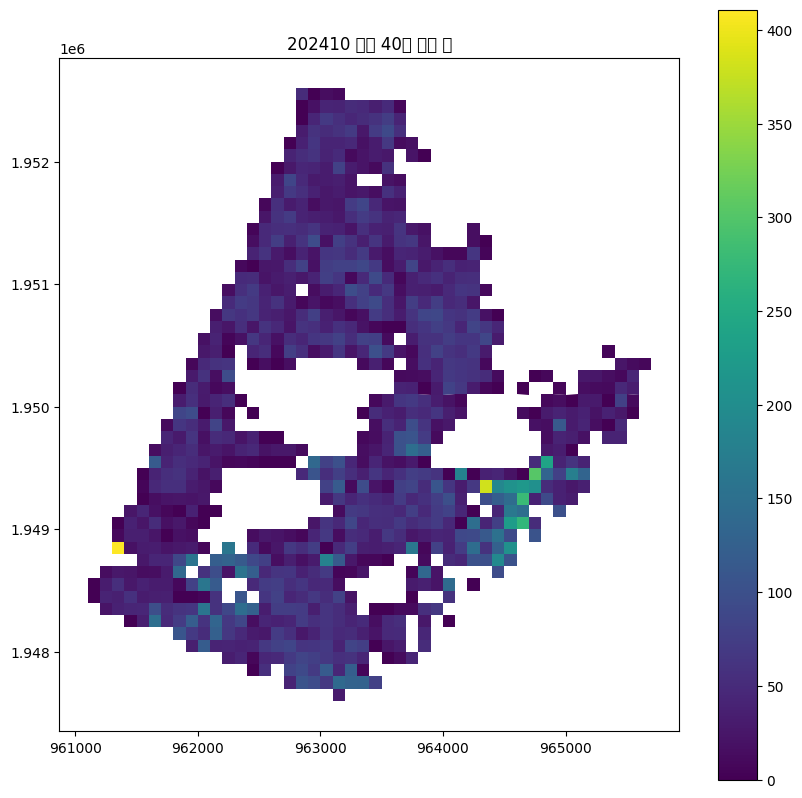

In [ ]:
ax = gdf_plot.plot(column='202410_기준_40대인구수', cmap='viridis', legend=True, figsize=(10, 10))
ax.set_title("202410 기준 40대 인구 수")
plt.show()